In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
pd.set_option('display.max_columns', None)

# Lab 4

In [3]:
marketing_customer_analysis = pd.read_csv('csv_files/marketing_customer_analysis.csv')
marketing_customer_analysis

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
#Check the data types of the columns. 

marketing_customer_analysis.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

**Split numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.**

In [5]:
df_numerical = marketing_customer_analysis.select_dtypes(include=[np.number])

df_categoricals = marketing_customer_analysis.select_dtypes(include=[object])

df_numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


**Now we will try to check the normality of the numerical variables visually**

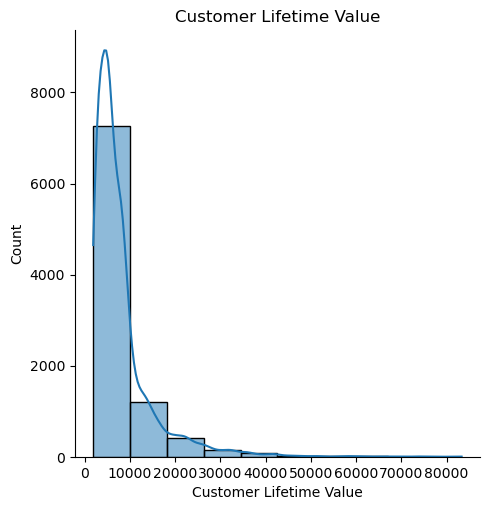

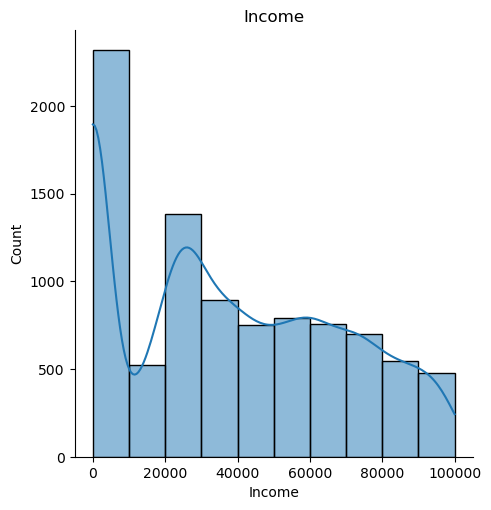

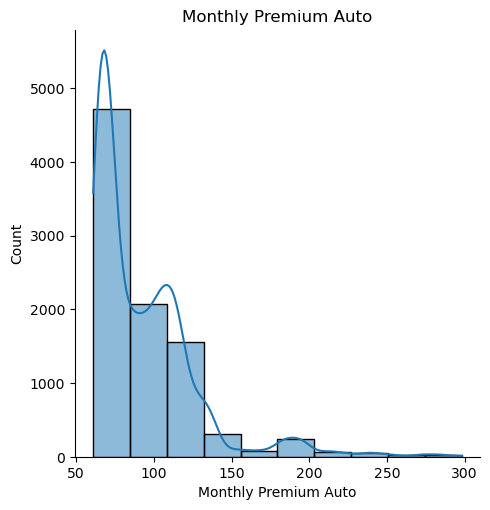

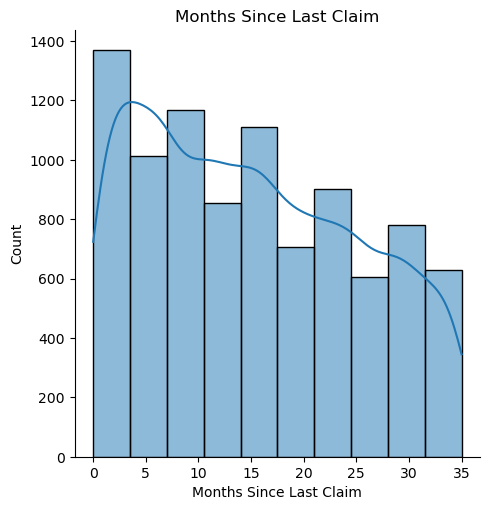

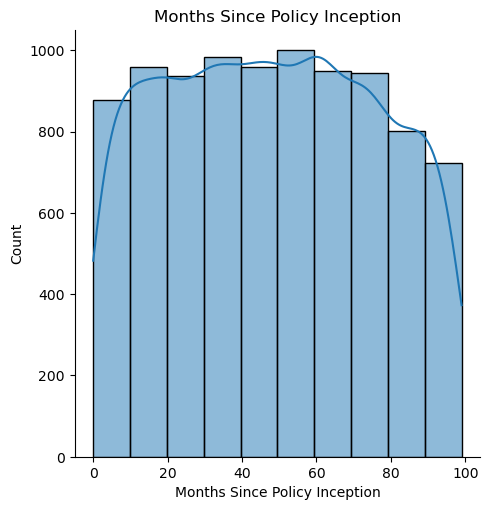

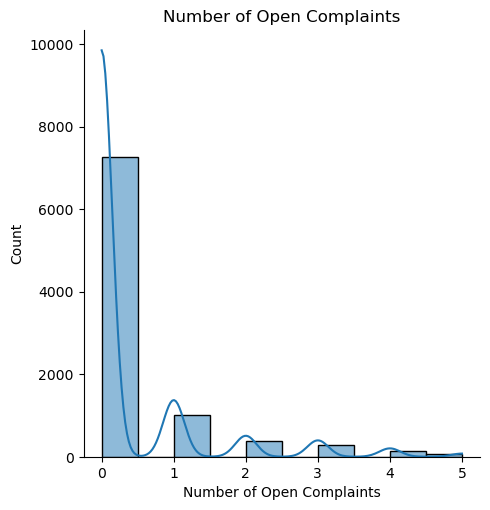

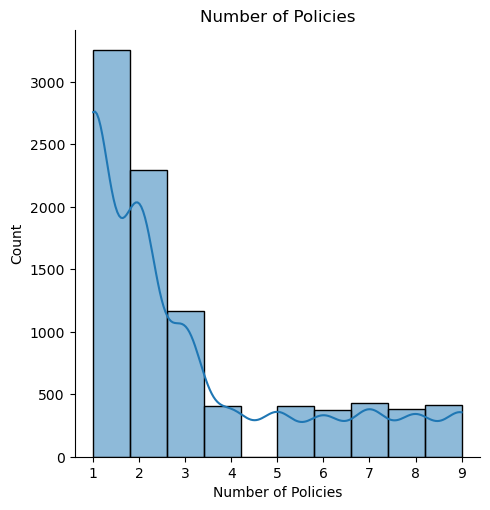

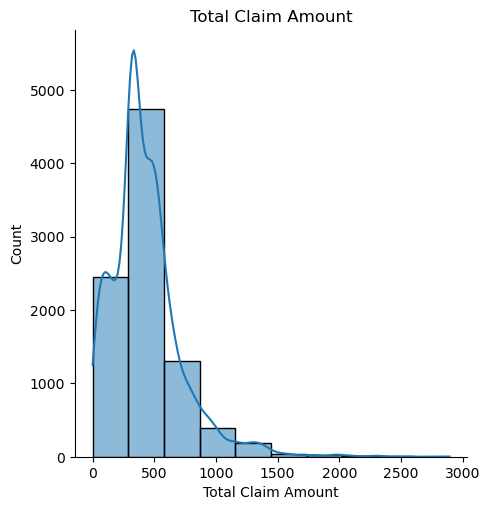

In [6]:
for colname in df_numerical.columns:

    sns.displot(df_numerical[colname],bins=10,kde=True)
    plt.title(colname)
    plt.show()

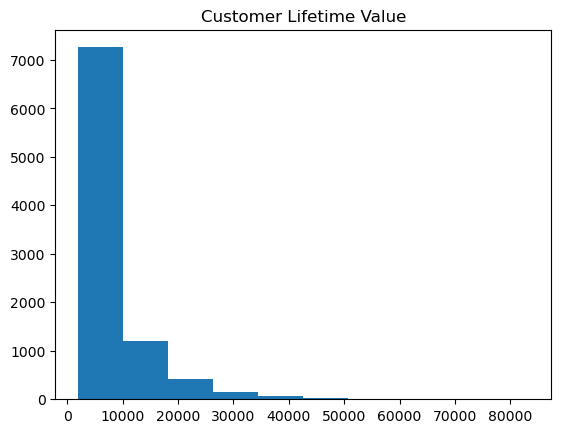

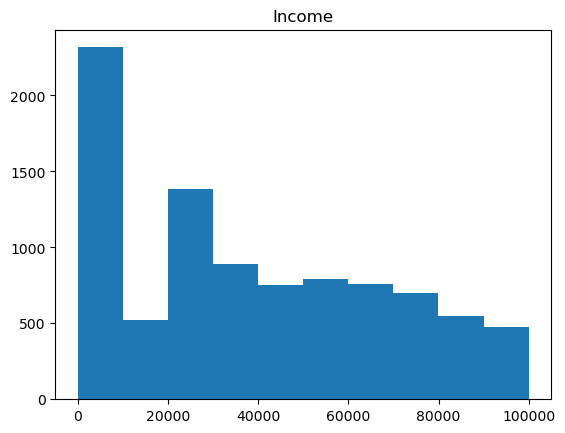

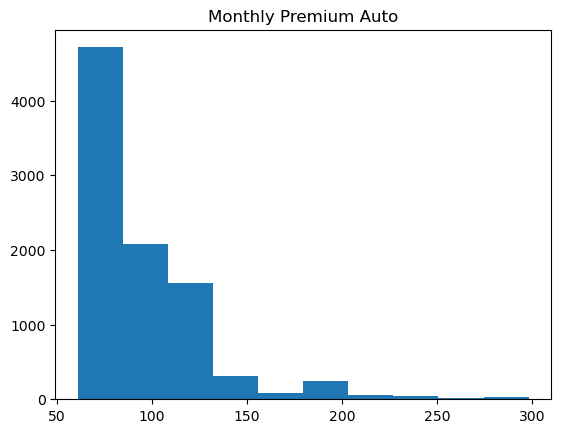

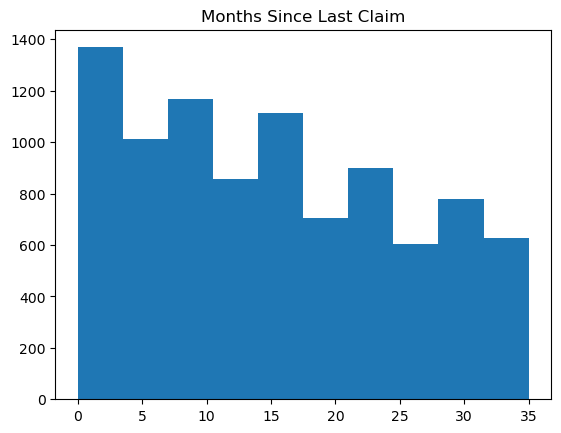

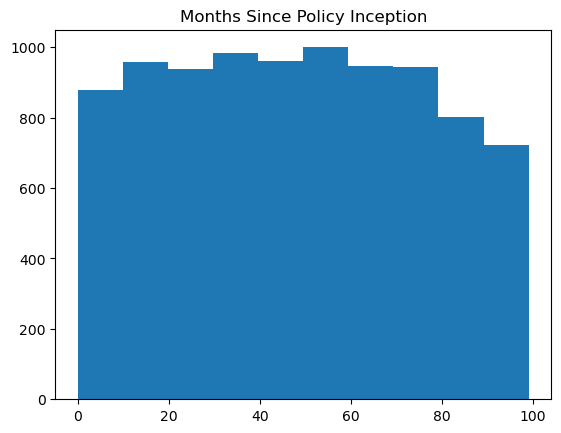

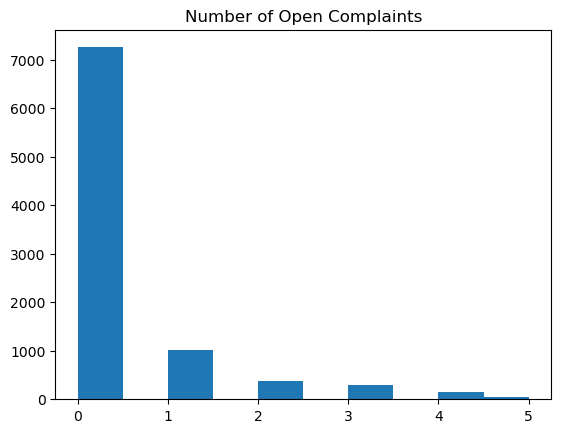

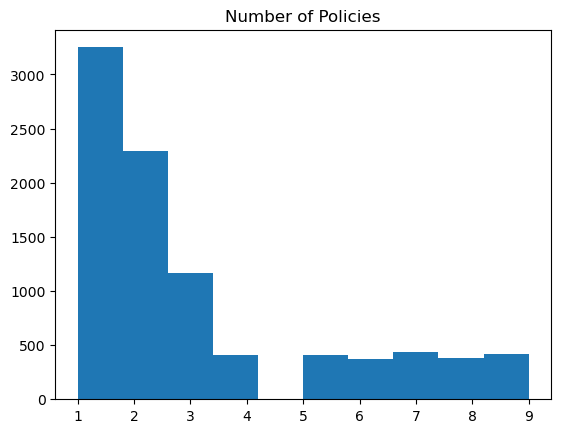

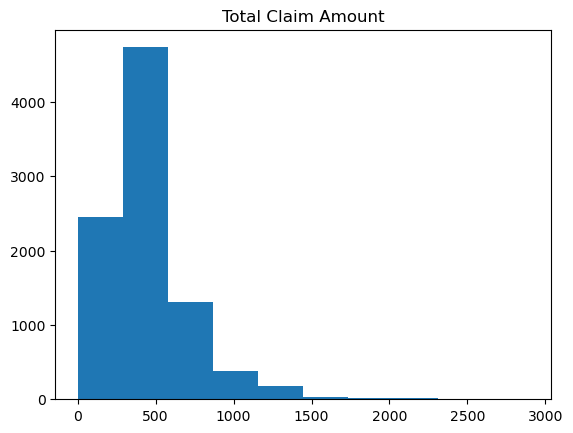

In [7]:
#Use Matplotlib to construct histograms

for col in df_numerical.columns:
    plt.hist(df_numerical[col], bins=10)
    plt.title(col)
    plt.show()



In [8]:
#Do the distributions for different numerical variables look like a normal distribution? 

#Just the 'months since policy inception'


In [9]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 

df_numerical.corr()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


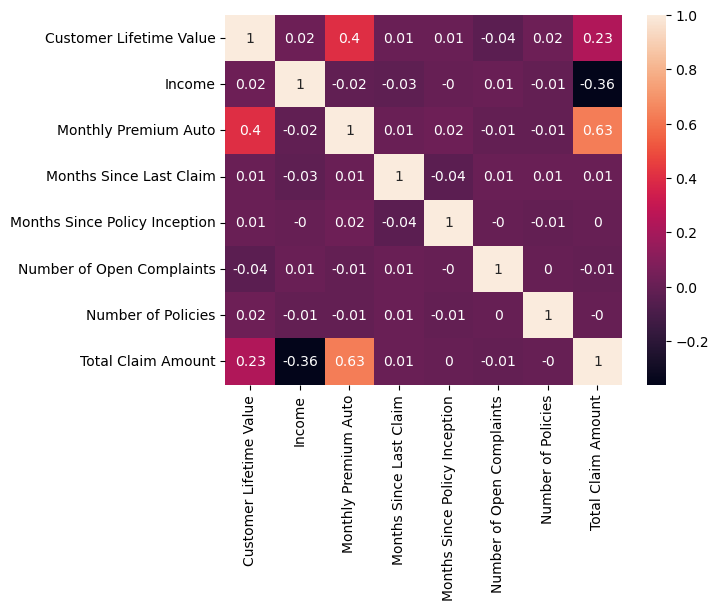

In [10]:
correlation = round(df_numerical.corr(),2)
sns.heatmap(correlation, annot=True)
plt.show()

In [11]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any feature

#There's no problems with the multicollinearity

# Lab 5

In [12]:
#X-y split.
#We separate the target form the rest of the features

y = marketing_customer_analysis['Total Claim Amount']
X = marketing_customer_analysis.drop(['Total Claim Amount','Customer'], axis=1)

We decide to drop 'Customer' column because all of the values are unique, so we can't do predictions on data that is too granular, because we will end with a perfect model.  

In [13]:
#Normalize (numerical).

#We separate the numerical data from the categorical data.

X_num = X.select_dtypes(include=[np.number])
X_cat = X.select_dtypes(include=[object])



In [14]:
X_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


**Scaling**

**We scaling with MinMaxScaler the numerical DF**

In [15]:
# Normalizing data: make data range from 0 - 1, instead of from min to max

transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)
print(X_normalized.shape)
X_normalized
X_num_minmax = pd.DataFrame(X_normalized, columns=X_num.columns)

(9134, 7)


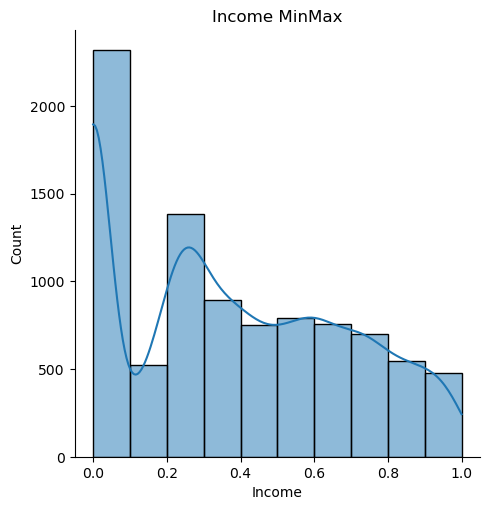

In [16]:
sns.displot(X_num_minmax['Income'],bins=10,kde=True)
plt.title('Income MinMax')
plt.show()

In [17]:
#We can observe in this case that the minimun in X axe is zero, and the maximum is 1. 

**We can scaling with Standard too, but we are not going to use this in this case, because we will be scaling categoriacal columns with OHE, and therefore have set our scale from 0 to 1.**

In [18]:
## scaling standard scaler: make data distributed with mean=0 and std=1
#transformer = StandardScaler().fit(X_num)
#x_standardized = transformer.transform(X_num)
#print(x_standardized.shape)
#x_num_standard = pd.DataFrame(x_standardized, columns=X_num.columns)

In [19]:
#sns.displot(x_num_standard['Income'],bins=10,kde=True)
#plt.title('Income Standard')
#plt.show()

In [20]:
#We can observe in this case that the minimun in X axe is -1, and the maximum is 2. 

#In conclusion, there is no a real difference between scaling in maxmin or in standard, in this case. 

# Lab 6

**One Hot/Label Encoding (categorical).**


In [21]:
X_cat.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [22]:
#encoder = OneHotEncoder().fit(X_cat['Response'])
encoder = OneHotEncoder(drop='first').fit(X_cat)
#print(encoder.categories_)

encoded = encoder.transform(X_cat).toarray()
#print(encoded)
cols = encoder.get_feature_names_out(input_features=X_cat.columns)

#onehot_encoded = pd.DataFrame(encoded,columns=['No', 'Yes'])
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head(5)
X_cat_encoded = onehot_encoded


In [23]:
X_cat_encoded

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Effective To Date_1/10/11,Effective To Date_1/11/11,Effective To Date_1/12/11,Effective To Date_1/13/11,Effective To Date_1/14/11,Effective To Date_1/15/11,Effective To Date_1/16/11,Effective To Date_1/17/11,Effective To Date_1/18/11,Effective To Date_1/19/11,Effective To Date_1/2/11,Effective To Date_1/20/11,Effective To Date_1/21/11,Effective To Date_1/22/11,Effective To Date_1/23/11,Effective To Date_1/24/11,Effective To Date_1/25/11,Effective To Date_1/26/11,Effective To Date_1/27/11,Effective To Date_1/28/11,Effective To Date_1/29/11,Effective To Date_1/3/11,Effective To Date_1/30/11,Effective To Date_1/31/11,Effective To Date_1/4/11,Effective To Date_1/5/11,Effective To Date_1/6/11,Effective To Date_1/7/11,Effective To Date_1/8/11,Effective To Date_1/9/11,Effective To Date_2/1/11,Effective To Date_2/10/11,Effective To Date_2/11/11,Effective To Date_2/12/11,Effective To Date_2/13/11,Effective To Date_2/14/11,Effective To Date_2/15/11,Effective To Date_2/16/11,Effective To Date_2/17/11,Effective To Date_2/18/11,Effective To Date_2/19/11,Effective To Date_2/2/11,Effective To Date_2/20/11,Effective To Date_2/21/11,Effective To Date_2/22/11,Effective To Date_2/23/11,Effective To Date_2/24/11,Effective To Date_2/25/11,Effective To Date_2/26/11,Effective To Date_2/27/11,Effective To Date_2/28/11,Effective To Date_2/3/11,Effective To Date_2/4/11,Effective To Date_2/5/11,Effective To Date_2/6/11,Effective To Date_2/7/11,Effective To Date_2/8/11,Effective To Date_2/9/11,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0

**Concat DataFrames**


In [24]:
X = pd.concat([X_num_minmax, X_cat_encoded], axis=1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Effective To Date_1/10/11,Effective To Date_1/11/11,Effective To Date_1/12/11,Effective To Date_1/13/11,Effective To Date_1/14/11,Effective To Date_1/15/11,Effective To Date_1/16/11,Effective To Date_1/17/11,Effective To Date_1/18/11,Effective To Date_1/19/11,Effective To Date_1/2/11,Effective To Date_1/20/11,Effective To Date_1/21/11,Effective To Date_1/22/11,Effective To Date_1/23/11,Effective To Date_1/24/11,Effective To Date_1/25/11,Effective To Date_1/26/11,Effective To Date_1/27/11,Effective To Date_1/28/11,Effective To Date_1/29/11,Effective To Date_1/3/11,Effective To Date_1/30/11,Effective To Date_1/31/11,Effective To Date_1/4/11,Effective To Date_1/5/11,Effective To Date_1/6/11,Effective To Date_1/7/11,Effective To Date_1/8/11,Effective To Date_1/9/11,Effective To Date_2/1/11,Effective To Date_2/10/11,Effective To Date_2/11/11,Effective To Date_2/12/11,Effective To Date_2/13/11,Effective To Date_2/14/11,Effective To Date_2/15/11,Effective To Date_2/16/11,Effective To Date_2/17/11,Effective To Date_2/18/11,Effective To Date_2/19/11,Effective To Date_2/2/11,Effective To Date_2/20/11,Effective To Date_2/21/11,Effective To Date_2/22/11,Effective To Date_2/23/11,Effective To Date_2/24/11,Effective To Date_2/25/11,Effective To Date_2/26/11,Effective To Date_2/27/11,Effective To Date_2/28/11,Effective To Date_2/3/11,Effective To Date_2/4/11,Effective To Date_2/5/11,Effective To Date_2/6/11,Effective To Date_2/7/11,Effective To Date_2/8/11,Effective To Date_2/9/11,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1.0,0.0,0.0,0.0,0.0,

**Train-test split**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 108)
(1827, 108)
(7307,)
(1827,)


**Apply linear regression**

In [27]:
#we train/fit our model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

**Model Validation**

In [28]:
#R2
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.774751710827781

In [29]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7683279845917008

In [30]:
y_test[:5]

5019    609.680428
4152    498.779439
567     792.000000
1460    364.800000
1945    350.400000
Name: Total Claim Amount, dtype: float64

In [31]:
predictions_test[:5]

array([538.34658414, 600.03987257, 950.63200751, 453.15327399,
       389.13547107])

In [32]:
#MSE
mse=mean_squared_error(y_test,predictions_test)
mse

17991.255426558655

In [33]:
#RMSE
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

134.13148558991904

In [34]:
y_test.mean()

434.30076164915164

In [35]:
#MAE
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

95.47146671559645


**After cheking our model, we can say that it's pretty accurate with our R2 score of 0.77**

# Lab 7

In [36]:
#Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

#use the concept of multicollinearity and remove insignificant variables
#use a different method of scaling the numerical variables
#use a different ratio of train test split
#use the transformation on numerical columns which align it more towards a normal distribution

**Try to improve the linear regression model.**

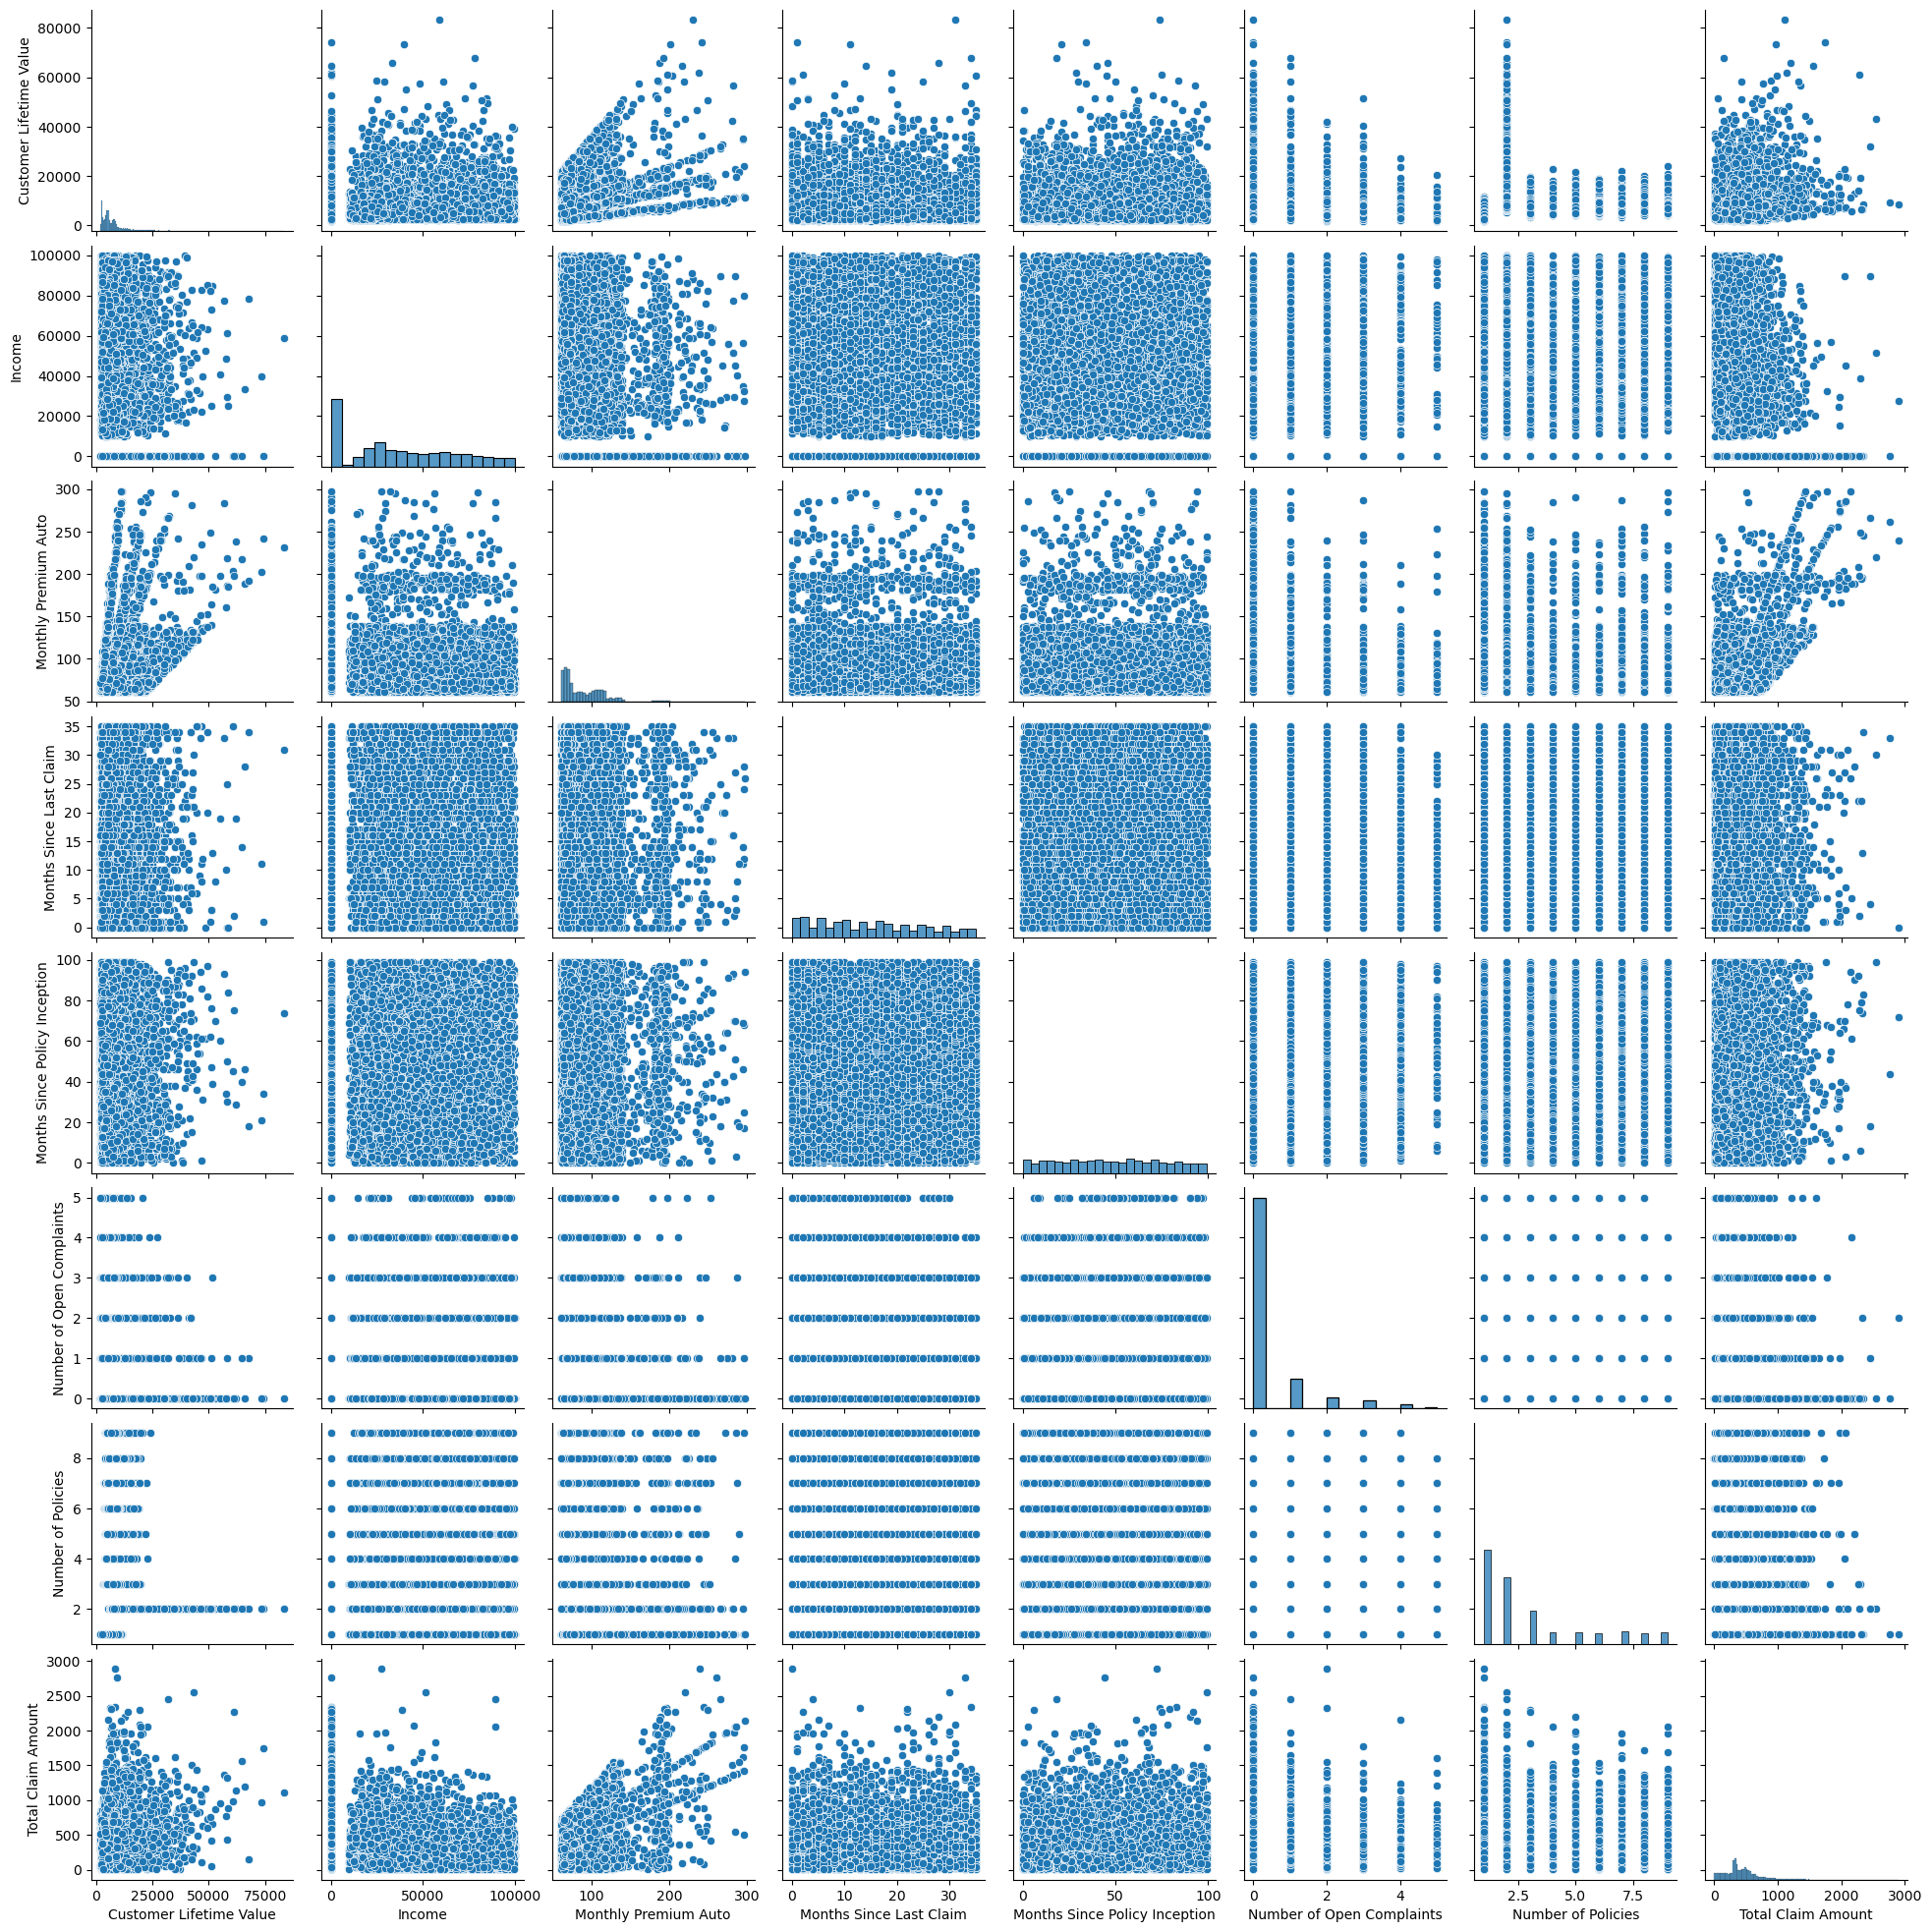

In [37]:
#check correlation with pairplot

sns.pairplot(marketing_customer_analysis)

**After checking the correlation, we can say that there's no multicolinearity, so we are not going to drop any columns.**

**Now we are going to check the outliers in the columns with more correlation with our target.**

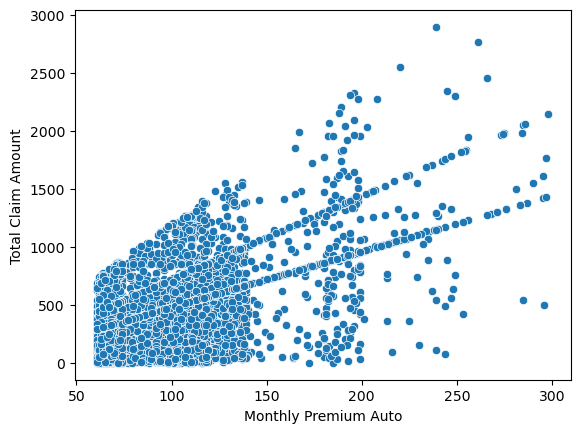

In [38]:
sns.scatterplot(data=marketing_customer_analysis, x = 'Monthly Premium Auto',y='Total Claim Amount')
plt.show()

**We can't see really any outliers in this case. Even if the data points are more dispers agter 150, we can still see a lot of correlation with the target.**

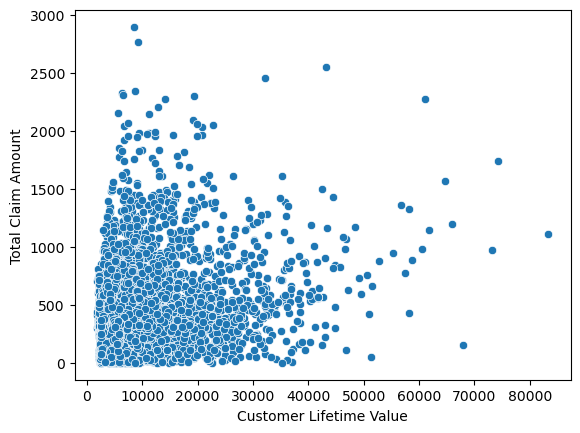

In [39]:
sns.scatterplot(data=marketing_customer_analysis, x = 'Customer Lifetime Value',y='Total Claim Amount')
plt.show()

In [40]:
iqr = np.percentile(marketing_customer_analysis['Customer Lifetime Value'],75) - np.percentile(marketing_customer_analysis['Customer Lifetime Value'],25)
marketing_customer_analysis2 = marketing_customer_analysis[marketing_customer_analysis['Customer Lifetime Value']<=np.percentile(marketing_customer_analysis['Customer Lifetime Value'],75) + 1.5*iqr]


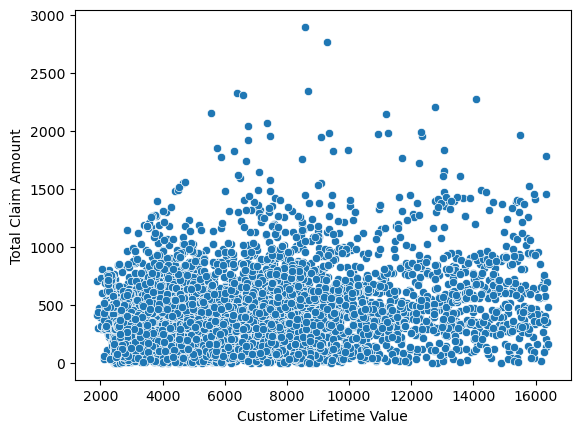

In [41]:
sns.scatterplot(data=marketing_customer_analysis2, x = 'Customer Lifetime Value',y='Total Claim Amount')
plt.show()

**We can see that the correlation is not as strong as before, so we are not going to change it.**

**Now we are going to check the normalization of our target.**

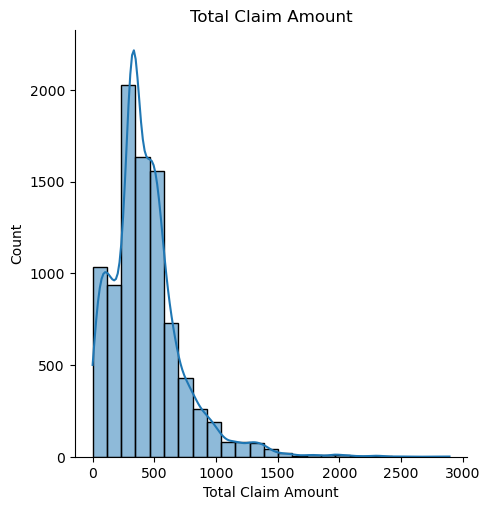

In [42]:
sns.displot(marketing_customer_analysis['Total Claim Amount'],bins=25,kde=True)
plt.title('Total Claim Amount')
plt.show()

**We can see that the curve is skewed to the left, and has a long tail. So we are going to normalize it, by filtering the values between 25% and 1000 ( I tried 75%, but there was still a long tail.)** 

In [43]:
#Filtering our data frame
marketing_customer_analysis3 = marketing_customer_analysis[(marketing_customer_analysis['Total Claim Amount']<=1000) & (marketing_customer_analysis['Total Claim Amount']>=np.percentile(marketing_customer_analysis['Total Claim Amount'],25) - 1.5*iqr)]

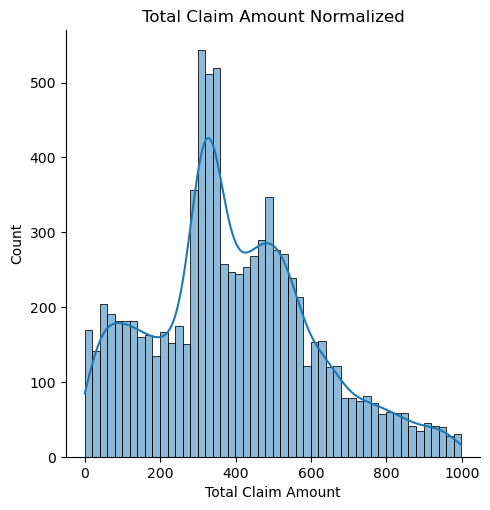

In [44]:
sns.displot(marketing_customer_analysis3['Total Claim Amount'],bins=50,kde=True)
plt.title('Total Claim Amount Normalized')
plt.show()

**Here we can see that now our data looks more normalized. So we are going to test if with this change our model works better.**

Training our model with the new data. 

In [45]:
#X-y split.
#We separate the target form the rest of the features

y = marketing_customer_analysis3['Total Claim Amount']
X = marketing_customer_analysis3.drop(['Total Claim Amount','Customer'], axis=1)


#Normalize (numerical).

#We separate the numerical data from the categorical data.

X_num = X.select_dtypes(include=[np.number])
X_cat = X.select_dtypes(include=[object])


# Normalizing data: make data range from 0 - 1, instead of from min to max

transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)
print(X_normalized.shape)
X_normalized
X_num_minmax = pd.DataFrame(X_normalized, columns=X_num.columns)


#encoder = OneHotEncoder().fit(X_cat['Response'])
encoder = OneHotEncoder(drop='first').fit(X_cat)
#print(encoder.categories_)

encoded = encoder.transform(X_cat).toarray()
#print(encoded)
cols = encoder.get_feature_names_out(input_features=X_cat.columns)

#onehot_encoded = pd.DataFrame(encoded,columns=['No', 'Yes'])
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head(5)
X_cat_encoded = onehot_encoded


X = pd.concat([X_num_minmax, X_cat_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


(8731, 7)


In [46]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [47]:
#R2
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7921539214610199

In [48]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7670293464126459

In [49]:
#MSE
mse=mean_squared_error(y_test,predictions_test)
mse

10879.835167337202

In [50]:
#RMSE
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

104.30644834974107

In [51]:
y_test.mean()

390.17262515626794

**As we can see from the r2_score and from the RMSE, now our model is more accurate.**